In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from fitsio import FITS,FITSHDR
import fitsio

In [2]:
filename='data/syssmooth/allwise_total_rot_1024.fits'
mp=hp.read_map(filename)

/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 1024
  warnings.warn("NSIDE = {0:d}".format(nside))
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the s

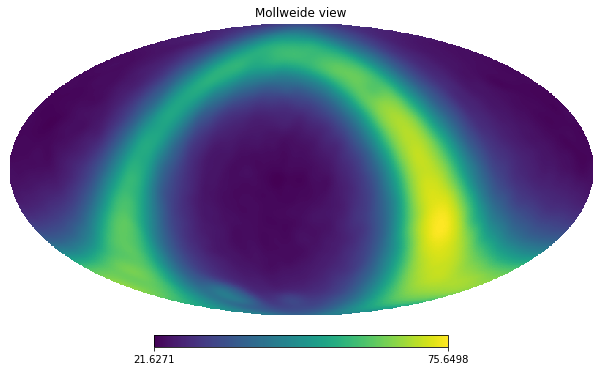

In [3]:
hp.mollview(mp)

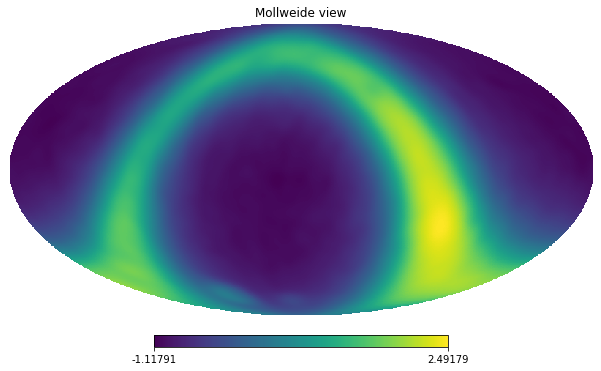

In [6]:
#ell = np.arange(0, 1000)
#Cl = (ell+1e-10)**(-0.)
#Cl[0:2] = 0.0
#Nside = 128
#mp = hp.synfast(Cl, nside=128, verbose=False)
mp-=np.mean(mp)
mp /= mp.std()
hp.mollview(mp)

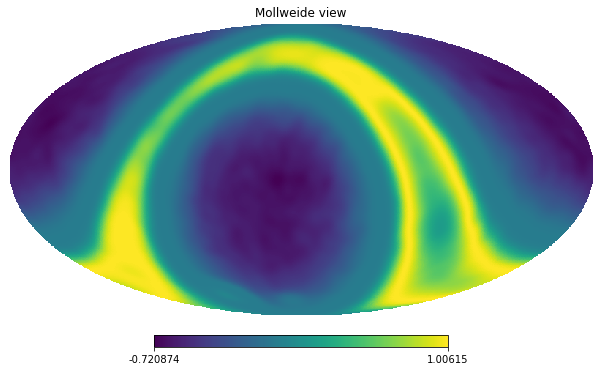

In [7]:
sysmap = np.sin(mp)**3
sysmap = sysmap - np.mean(sysmap)
hp.mollview(sysmap)

/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 254.796540 arcmin (0.074117 rad) 
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 600.000000 arcmin
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 509.593080 arcmin (0.148235 rad) 
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 1200.000000 a

<Figure size 432x288 with 0 Axes>

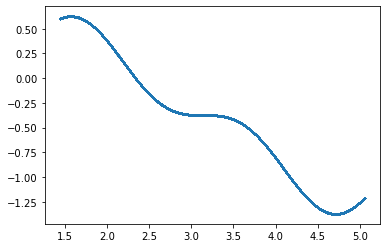

<Figure size 432x288 with 0 Axes>

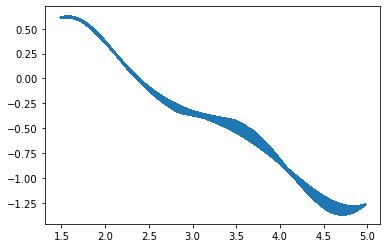

<Figure size 432x288 with 0 Axes>

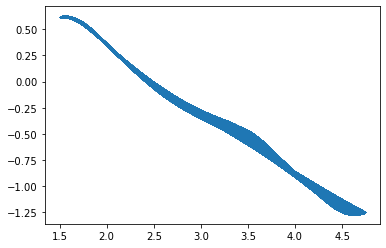

<Figure size 432x288 with 0 Axes>

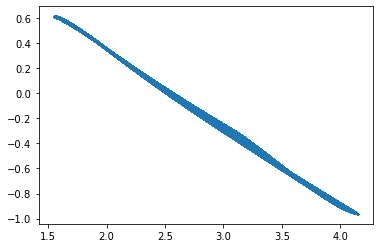

In [16]:
smrat = [0,10,20,40]
for smooth in smrat:
    mapsmooth = hp.smoothing(mp, fwhm=np.radians(smooth))
    syssmooth = hp.smoothing(sysmap, fwhm=np.radians(smooth))
    plt.figure()
    fig, ax = plt.subplots()
    ax.scatter(mapsmooth,syssmooth,marker='.',s=0.2)
    

/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the s

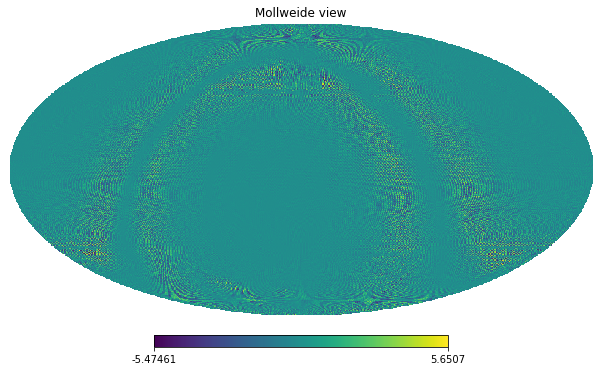

In [12]:
Nside=1024
alm=hp.sphtfunc.map2alm(mp,lmax=Nside*2)
ellm = np.arange(0, Nside*2)
fl=ellm*(ellm+1)
almmod=hp.sphtfunc.almxfl(alm,fl)
mapmod=hp.sphtfunc.alm2map(almmod,Nside)
mapmod /= mapmod.std()
hp.mollview(mapmod)

In [14]:
#mpsq=mp**2#subtract mean

/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 254.796540 arcmin (0.074117 rad) 
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 600.000000 arcmin
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 509.593080 arcmin (0.148235 rad) 
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 1200.000000 a

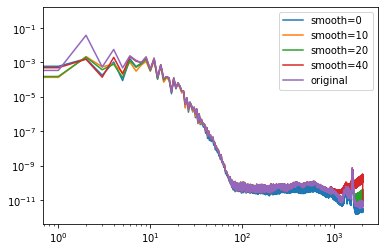

In [23]:
smrat = [0,10,20,40]
fig,ax  = plt.subplots()
cl = hp.anafast(sysmap, lmax=Nside*2)


for smooth in smrat:
    mapsmooth = hp.smoothing(mp, fwhm=np.radians(smooth))
    syssmooth = hp.smoothing(sysmap, fwhm=np.radians(smooth))
    mpsqsmooth=mapsmooth**2
    mpsqsmooth-=np.mean(mpsqsmooth)
    Nside=hp.pixelfunc.get_nside(mapsmooth)
    alm=hp.sphtfunc.map2alm(mapsmooth,lmax=Nside*2)
    ellm = np.arange(0, Nside*2)
    fl=ellm*(ellm+1)
    almmod=hp.sphtfunc.almxfl(alm,fl)
    mapmodsmooth=hp.sphtfunc.alm2map(almmod,Nside)
    #mapmodsmooth=hp.smoothing(mapmod, fwhm=np.radians(smooth))
    #print (mapsmooth.mean(), syssmooth.mean())
    #swap smoothing and squaring/alm*l^2
    M=np.array([[(mapsmooth**2).sum(),(mapsmooth*mpsqsmooth).sum(),(mapsmooth*mapmodsmooth).sum()]
                ,[(mapsmooth*mpsqsmooth).sum(),(mpsqsmooth**2).sum(),(mpsqsmooth*mapmodsmooth).sum()]
                ,[(mapsmooth*mapmodsmooth).sum(),(mpsqsmooth*mapmodsmooth).sum(),(mapmodsmooth**2).sum()]])
    Minv=np.linalg.inv(M)
    v=np.array([(sysmap*mapsmooth).sum(),(sysmap*mpsqsmooth).sum(),(sysmap*mapmodsmooth).sum()])
    coef = np.dot(v,Minv[0])
    coef2=np.dot(v,Minv[1])
    coef3=np.dot(v,Minv[2])
    #correlation
    #print (coef)
    sysclean = sysmap-coef*mapsmooth-coef2*mpsqsmooth-coef3*mapmodsmooth
    cl_clean = hp.anafast(sysclean, lmax=Nside*2)
    
    ax.plot(cl_clean[2:], label='smooth={}'.format(smooth))
ax.plot(cl[2:], label='original')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
#ax.set_ylim(1e-4,1e-1)

/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 254.796540 arcmin (0.074117 rad) 
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 600.000000 arcmin
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/cvmfs/astro.sdcc.bnl.gov/SL73/packages/bacon/latest/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin

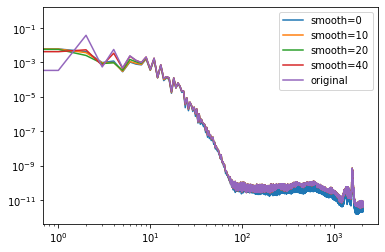

In [10]:
smrat = [0,10,20,40]
fig,ax  = plt.subplots()
Nside=hp.pixelfunc.get_nside(mp)
cl = hp.anafast(sysmap, lmax=Nside*2)


for smooth in smrat:
    mapsmooth = hp.smoothing(mp, fwhm=np.radians(smooth))
    syssmooth = hp.smoothing(sysmap, fwhm=np.radians(smooth))
    mpsqsmooth=mapsmooth**2
    mpsqsmooth-=np.mean(mpsqsmooth)
    Nside=hp.pixelfunc.get_nside(mapsmooth)
    alm=hp.sphtfunc.map2alm(mapsmooth,lmax=Nside*2)
    ellm = np.arange(0, Nside*2)
    fl=ellm*(ellm+1)
    almmod=hp.sphtfunc.almxfl(alm,fl)
    mapmodsmooth=hp.sphtfunc.alm2map(almmod,Nside)
    #mapmodsmooth=hp.smoothing(mapmod, fwhm=np.radians(smooth))
    #print (mapsmooth.mean(), syssmooth.mean())
    #swap smoothing and squaring/alm*l^2
    coef = (sysmap*mapsmooth).sum()/(mapsmooth**2).sum()#+(sysmap*mpsqsmooth).sum()/(mapsmooth*mpsqsmooth).sum()
    #+(sysmap*mapmodsmooth).sum()/(mapsmooth*mapmodsmooth).sum()
    coef2=(sysmap*mpsqsmooth).sum()/(mpsqsmooth**2).sum()+(sysmap*mapsmooth).sum()/(mpsqsmooth*mapsmooth).sum()
    +(sysmap*mapmodsmooth).sum()/(mpsqsmooth*mapmodsmooth).sum()
    coef3=(sysmap*mapmodsmooth).sum()/(mapmodsmooth**2).sum()+(sysmap*mapsmooth).sum()/(mapmodsmooth*mapsmooth).sum()
    +(sysmap*mpsqsmooth).sum()/(mapmodsmooth*mpsqsmooth).sum()
    #correlation
    #print (coef)
    sysclean = sysmap-coef*mapsmooth#-coef2*mpsqsmooth-coef3*mapmodsmooth
    cl_clean = hp.anafast(sysclean, lmax=Nside*2)
    
    ax.plot(cl_clean[2:], label='smooth={}'.format(smooth))
ax.plot(cl[2:], label='original')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
#ax.set_ylim(1e-4,1e-1)